In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,accuracy_score,f1_score,RocCurveDisplay


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

<Axes: xlabel='target'>

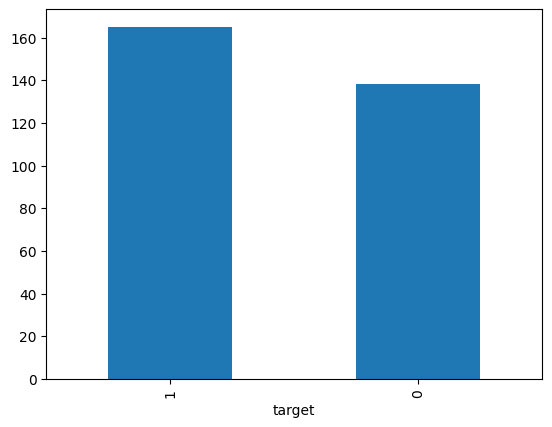

In [7]:
df.target.value_counts().plot(kind="bar")

In [12]:
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
print(df.sex.value_counts())
pd.crosstab(df.target,df.sex)

sex
1    207
0     96
Name: count, dtype: int64


sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

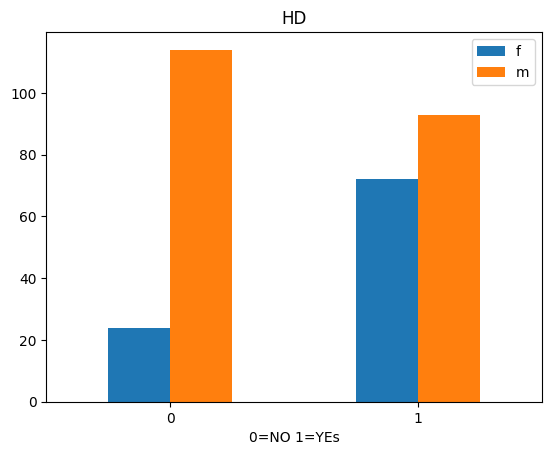

In [15]:
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.title("HD")
plt.xlabel("0=NO 1=YEs")
plt.legend(["f","m"])
plt.xticks(rotation=0)

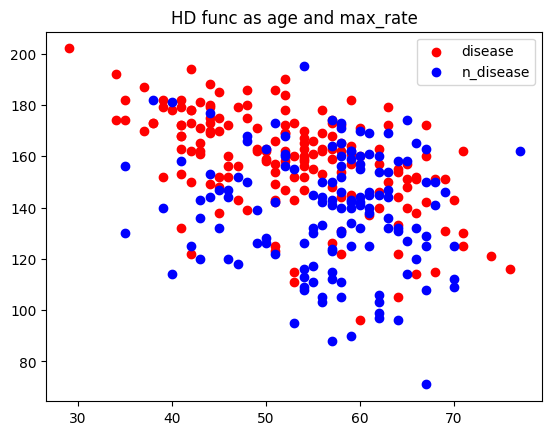

In [18]:
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")
plt.title("HD func as age and max_rate")
plt.legend(["disease","n_disease"])

<Axes: ylabel='Frequency'>

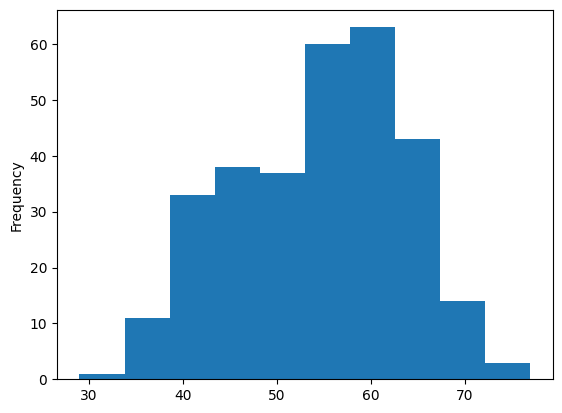

In [17]:
df.age.plot.hist()

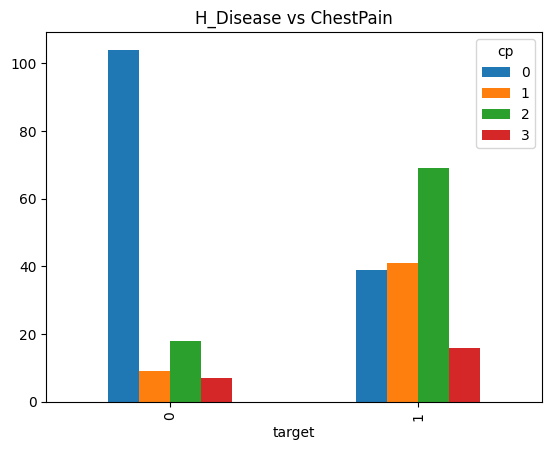

In [22]:
""" 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 
2: Non-anginal pain (typically esophageal spasms (non heart related),
3: Asymptomatic (chest pain not showing signs of disease)"""

pd.crosstab(df.target,df.cp).plot(kind="bar")
plt.title("H_Disease vs ChestPain")
plt.show()

In [20]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

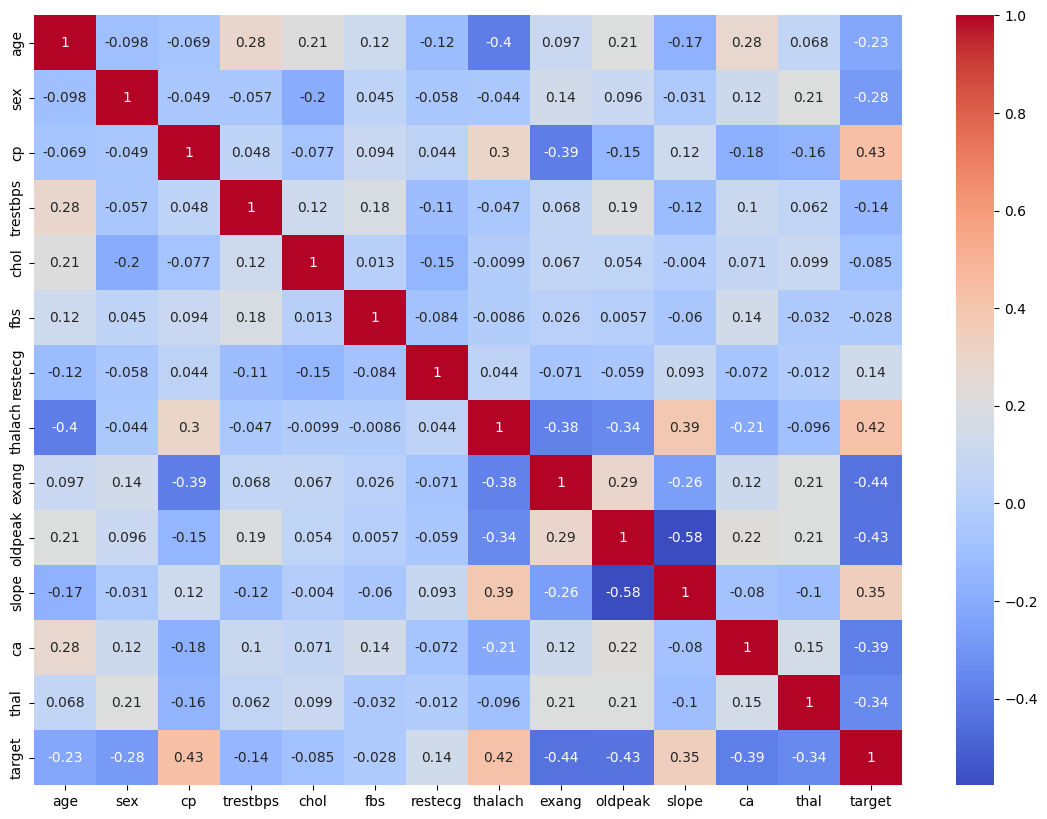

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
fig=plt.figure(figsize=(14, 10))  # Adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
models={"KNN":KNeighborsClassifier(),"LGR":LogisticRegression(),"RFC":RandomForestClassifier()}
from sklearn.model_selection import train_test_split
def fns(models,xtr,xte,ytr,yte):
    np.random.seed(42)
    msc={}
    for name,m in models.items():
        m.fit(xtr,ytr)
        msc[name]=m.score(xte,yte)
    return msc;

x=df.drop("target",axis=1)
y=df.target
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)
msc=fns(models,xtr,xte,ytr,yte)
msc

C:\Users\Shivagya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.639344262295082,
 'LGR': 0.9016393442622951,
 'RFC': 0.8688524590163934}

In [33]:
mcmp=pd.DataFrame(msc,index=["accuracy"])
mcmp=mcmp.T

In [34]:
mcmp

,accuracy
KNN,0.639344
LGR,0.901639
RFC,0.868852


<Axes: >

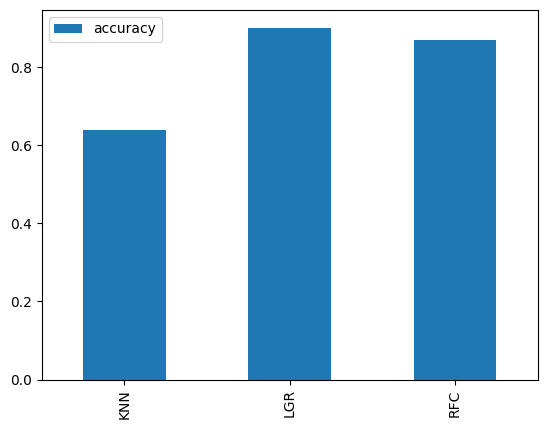

In [35]:
mcmp.plot(kind="bar")

In [37]:
m=KNeighborsClassifier()
dict={}
for i in range(1,21):
    m.set_params(n_neighbors=i)
    m.fit(xtr,ytr)
    dict[i]=m.score(xte,yte)
dict


{1: 0.639344262295082,
 2: 0.639344262295082,
 3: 0.6721311475409836,
 4: 0.6885245901639344,
 5: 0.639344262295082,
 6: 0.6229508196721312,
 7: 0.5737704918032787,
 8: 0.6065573770491803,
 9: 0.5901639344262295,
 10: 0.639344262295082,
 11: 0.6885245901639344,
 12: 0.6885245901639344,
 13: 0.6557377049180327,
 14: 0.6885245901639344,
 15: 0.639344262295082,
 16: 0.6721311475409836,
 17: 0.5737704918032787,
 18: 0.5901639344262295,
 19: 0.5409836065573771,
 20: 0.5737704918032787}

Text(0, 0.5, 'SCore')

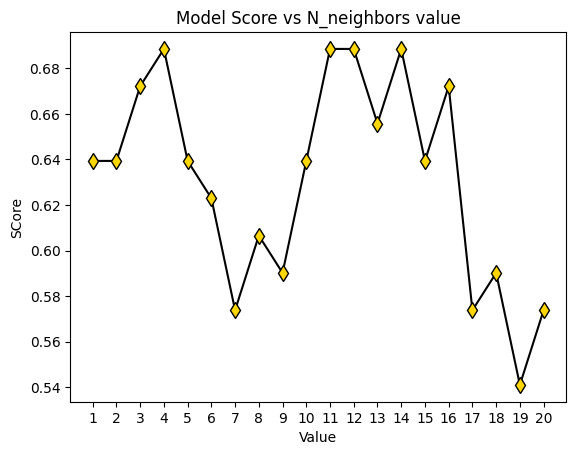

In [38]:
plt.plot(dict.keys(),dict.values(),marker='d',color="black", markerfacecolor='gold',
         markeredgecolor='black',
         markersize=8)
plt.xticks(range(1,21))
plt.title("Model Score vs N_neighbors value")  
plt.xlabel("Value")         
plt.ylabel("SCore")   

In [45]:
max_score = max(dict.values())
optimal_n_neighbors = max(dict, key=dict.get)

print(f"Maximum Score: {max_score}")
print(f"Optimal n_neighbors: {optimal_n_neighbors}")

Maximum Score: 0.6885245901639344
Optimal n_neighbors: 4


In [46]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [42]:
%%time
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(xtr,ytr);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1.14 s
Wall time: 1.36 s


In [43]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [44]:
rs_log_reg.score(xte, yte)

0.9016393442622951

In [48]:
%%time 
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(xtr,ytr);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 2min 59s
Wall time: 3min 14s


In [91]:
rs_rf.best_params_

{'n_estimators': np.int64(260),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(19),
 'max_depth': None}

In [92]:
rs_rf.score(xte,yte)

0.9344262295081968

In [53]:
%%time
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
from sklearn.model_selection import GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(xtr,ytr);


Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1.17 s
Wall time: 1.26 s


In [81]:
gs_log_reg.best_params_

{'C': np.float64(1.623776739188721), 'solver': 'liblinear'}

In [84]:
gs_log_reg.score(xte,yte)

0.9016393442622951

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def optimize_rf_with_grid(xtr, ytr, rs_rf):
    best_params = rs_rf.best_params_
    rf_grid = {
        'n_estimators': [best_params['n_estimators']-50, best_params['n_estimators'], best_params['n_estimators']+50],
        'max_depth': [best_params.get('max_depth', None)-5, best_params.get('max_depth', None), best_params.get('max_depth', None)+5] if best_params.get('max_depth', None) else [None],
        'min_samples_split': [best_params['min_samples_split']-2, best_params['min_samples_split'], best_params['min_samples_split']+2],
        'min_samples_leaf': [best_params['min_samples_leaf']-1, best_params['min_samples_leaf'], best_params['min_samples_leaf']+1],
        'max_features': ['sqrt'],
        'bootstrap': [True]
    }
    rf_model = RandomForestClassifier(random_state=42)
    gs_rf = GridSearchCV(estimator=rf_model, param_grid=rf_grid, cv=5, verbose=True, n_jobs=-1)
    gs_rf.fit(xtr,ytr)
    
    return gs_rf.best_params_, gs_rf.score(xte,yte),gs_rf

best_params, best_score,mm = optimize_rf_with_grid(xtr, ytr, rs_rf)
print("Best Parameters (GridSearchCV):", best_params)
print("Best Score (GridSearchCV):", best_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters (GridSearchCV): {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': np.int64(18), 'min_samples_split': np.int64(6), 'n_estimators': np.int64(210)}
Best Score (GridSearchCV): 0.9508196721311475


In [103]:
y_preds =mm.predict(xte)
y_preds

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

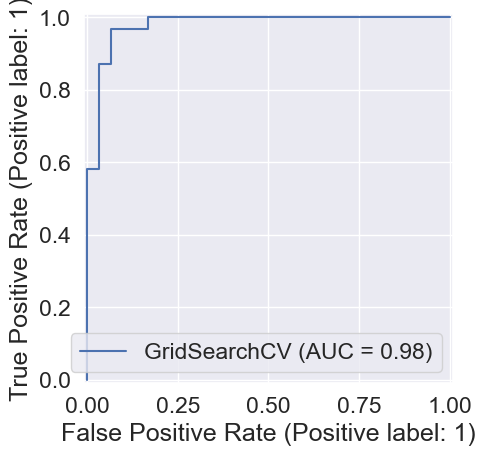

In [104]:
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(estimator=mm, 
                               X=xte, 
                               y=yte);

In [105]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yte, y_preds))

[[28  2]
 [ 1 30]]


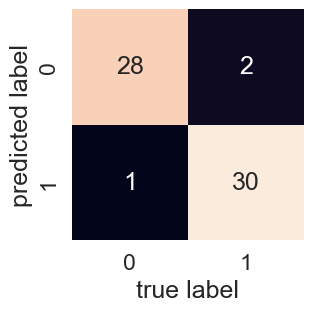

In [106]:
import seaborn as sns
sns.set(font_scale=1.5)
def ploot(yte, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(yte, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
ploot(yte, y_preds)

In [107]:
from sklearn.metrics import classification_report
print(classification_report(yte, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.94      0.97      0.95        31

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



### So after some hyperparameter tuning the models efficiency changed in the following manner-
### KNN': 0.639344262295082 to 0.6885245901639344
### LGR': 0.9016393442622951 to 0.9016393442622951(sadly no improvement)
### RFC': 0.8688524590163934 to 0.9508196721311475

In [124]:
gs_log_reg.score(xte,yte)

0.9016393442622951

In [125]:
gs_log_reg.best_params_

{'C': np.float64(1.623776739188721), 'solver': 'liblinear'}

In [127]:
%%time
mm2=LogisticRegression(C=1.623776739188721, solver="liblinear")

cv_acc = cross_val_score(mm2,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy") 
cv_acc

CPU times: total: 46.9 ms
Wall time: 52.9 ms


array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [128]:
mm.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': np.int64(18),
 'min_samples_split': np.int64(6),
 'n_estimators': np.int64(210)}

In [129]:
from sklearn.model_selection import cross_val_score
clf =RandomForestClassifier(
    bootstrap =True,
 max_depth=None,
 max_features="sqrt",
 min_samples_leaf=18,
 min_samples_split=6,
 n_estimators=210)

In [130]:
%%time

cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy") 
cv_acc

CPU times: total: 2.31 s
Wall time: 2.43 s


array([0.85245902, 0.8852459 , 0.80327869, 0.88333333, 0.78333333])

In [131]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8415300546448087)

In [132]:
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5,
                                       scoring="precision"))
cv_precision

np.float64(0.8229175159322217)

In [133]:
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5,
                                    scoring="recall"))
cv_recall

np.float64(0.8909090909090909)

In [137]:
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5,
                                scoring="f1"))
cv_f1

np.float64(0.8554754784237033)

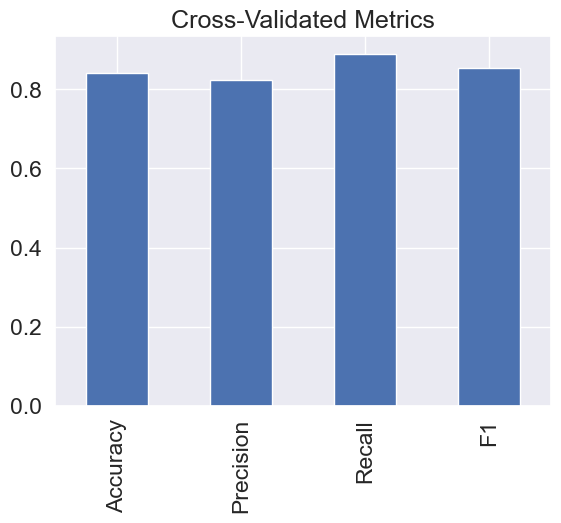

In [138]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [148]:
clf.fit(xtr,ytr);

In [165]:
clf.feature_importances_

array([0.0666433 , 0.01805405, 0.1988452 , 0.02436661, 0.02887953,
       0.        , 0.00940033, 0.10043484, 0.07265062, 0.12059331,
       0.04501841, 0.1854085 , 0.1297053 ])

In [167]:
import numpy as np
importances = clf.feature_importances_
features_dict = {col: imp for col, imp in zip(df.columns, importances)}
print(features_dict)


{'age': np.float64(0.06664329757988344), 'sex': np.float64(0.01805405465082558), 'cp': np.float64(0.19884519644849338), 'trestbps': np.float64(0.024366606288199737), 'chol': np.float64(0.028879527777441415), 'fbs': np.float64(0.0), 'restecg': np.float64(0.00940033349529456), 'thalach': np.float64(0.1004348399612452), 'exang': np.float64(0.07265062421212926), 'oldpeak': np.float64(0.12059330833212567), 'slope': np.float64(0.045018410733946655), 'ca': np.float64(0.18540849728725362), 'thal': np.float64(0.12970530323316154)}


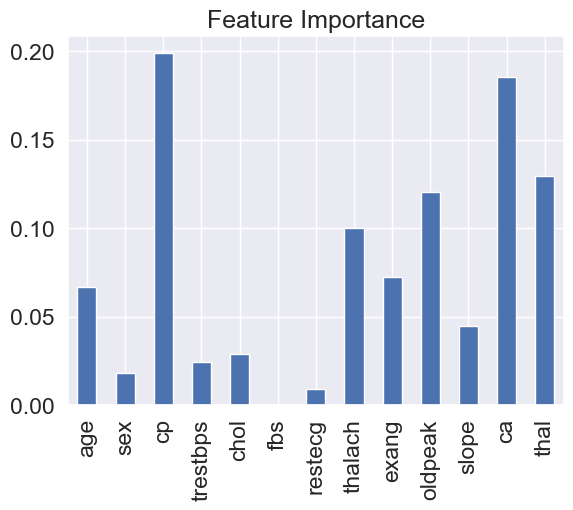

In [168]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);